<a href="https://colab.research.google.com/github/Steven-Macas/redes-neuronales-SAA/blob/main/SSA_stevenMacas_red_neuronal_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Redes Neuronales**

---

2. https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction. Clasificación binaria. El
objetivo es clasificar entre presencia de enfermedad del corazón o no a partir de una serie de atributos
(edad, sexo, colesterol, etc.). Para ello el dataset contiene una serie de datos pacientes etiquetados si
tienen enfermedad o no.

---

# **A** -Importación de librerías

In [1]:
!pip install keras tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# instalación de librería gráfica para ver cómo evoluciona la función de pérdida
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Importamos las librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #Para el mapa de calor, hacer celdas grandes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf # importación de módulos de keras y gráficos
from IPython.display import SVG
import livelossplot
import math

---


# **B** - Preproceso

In [4]:
data2 = pd.read_csv('heart.csv') #Dataset del heart



---



In [ ]:
data2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data2.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,1,4,110,264,0,1,132,0,1.2,1.0,1
914,68,1,3,144,193,1,1,141,0,3.4,1.0,1
915,57,1,3,130,131,0,1,115,1,1.2,1.0,1
916,57,2,1,130,236,0,2,174,0,0.0,1.0,1
917,38,1,2,138,175,0,1,173,0,0.0,0.0,0


In [ ]:
data2.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Cambiar valores

Columna sex 

M = 1

F = 2

Columna ChestPainType 

ATA = 1

NAP = 2

ASY = 3

TA = 4

Columna RestingEGC 

Normal = 1

ST = 0

LVH = 2

Columna ExerciseAngine 

N = 0

Y = 1

Columna ST_Slope 

Down = 2

Up = 1

Flat = 0

In [5]:
data2 = data2.replace('M', '1', regex=True)
data2 = data2.replace('F', '2', regex=True)
data2['Sex'] = pd.to_numeric(data2['Sex'],errors='coerce')

data2 = data2.replace('ATA', '1', regex=True)
data2 = data2.replace('NAP', '2', regex=True)
data2 = data2.replace('ASY', '3', regex=True)
data2 = data2.replace('TA', '4', regex=True)
data2['ChestPainType'] = pd.to_numeric(data2['ChestPainType'],errors='coerce')

data2 = data2.replace('Normal', '1', regex=True)
data2 = data2.replace('ST', '0', regex=True)
data2 = data2.replace('LVH', '2', regex=True)
data2['RestingECG'] = pd.to_numeric(data2['RestingECG'],errors='coerce')

data2['ST_Slope'] = data2['ST_Slope'].map({'Up': '0',
                                           '2lat':'1',
                                           'Down':'2',
                                           np.nan:'1'},
                                          na_action = None)
data2['ST_Slope'] = pd.to_numeric(data2['ST_Slope'],errors='coerce')

data2 = data2.replace('Y', '1', regex=True)
data2 = data2.replace('N', '0', regex=True)
data2['ExerciseAngina'] = pd.to_numeric(data2['ExerciseAngina'],errors='coerce')



---



In [ ]:
data2.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,1.210240,2.452070,132.396514,198.799564,0.233115,1.010893,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.407701,0.851832,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,2.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,2.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


---

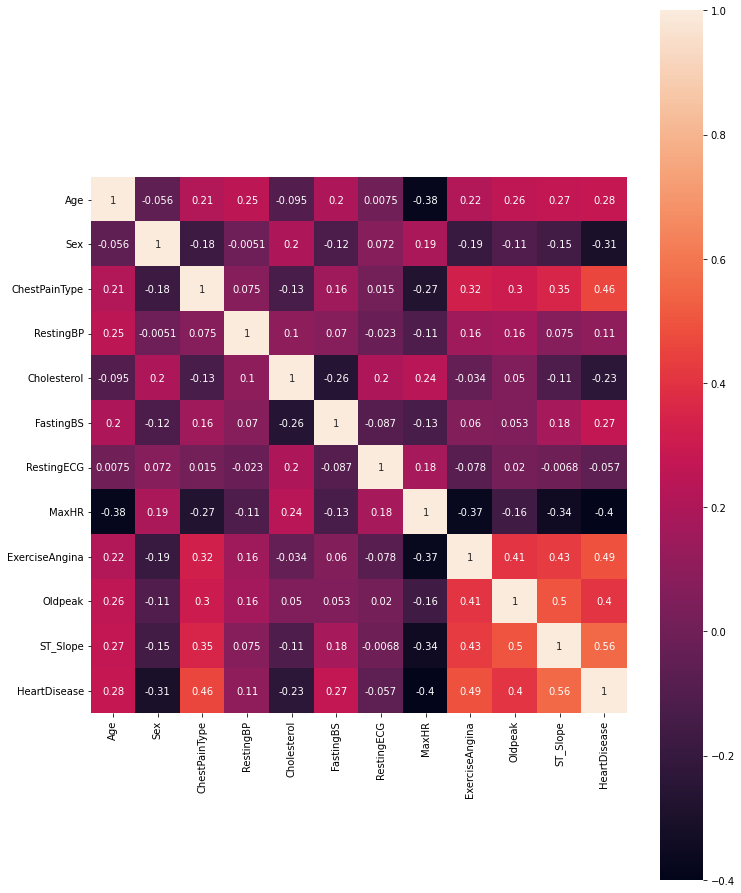

In [ ]:
#Mapa de Calor de Enfermedad del corazon
plt.figure(figsize=(12, 16))
map_calor2 = sns.heatmap(data2.corr(),square = True, annot = True)
map_calor2

---

**La característica que tendremos en cuenta para el estudio será la Calidad del vino**



In [6]:
#separamos datos de entrada y salida HEART
x_data2 = data2.drop('HeartDisease', axis=1)
y_data2 = data2['HeartDisease']

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data2,y_data2, random_state=1, test_size=0.75)
data2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,0,0
1,49,2,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,0,98,0,0.0,0,0
3,48,2,3,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,0,0


# **C** - Entrenamiento y Predicción

In [ ]:
model2 = GaussianNB()
model2.fit(x_train2, y_train2)
y_predict2 = model2.predict(x_test2)

# ***D*** - Evaluación

In [ ]:
print(accuracy_score(y_test2,y_predict2)) #0.8345428156748912 - Tenemos un porcentaje del 83,45% de acierto
y_predict2

0.8345428156748912


array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,

[]

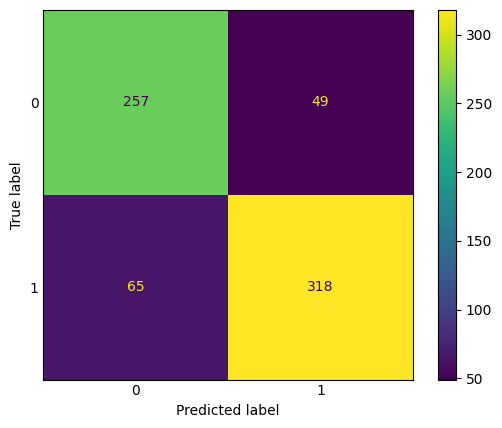

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test2, y_predict2)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.plot(b=None)

## **RED NEURONAL**

---

Creación de modelo basado en una red neuronal

### **Definir el conjunto de entrenamiento**

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_data2,y_data2, random_state=1, test_size=0.80)

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train.shape

(183, 10)

In [9]:
plot_losses = livelossplot.PlotLossesKeras()

### *Definir el modelo de red  y configuración del proceso de aprendizaje*

In [10]:
from keras. initializers import TruncatedNormal 
init = TruncatedNormal(stddev=0.01, seed=1)
# Build neural network
model = tf.keras.models.Sequential()
# Dense numero de neuronas, función de activación, ...
model.add(tf.keras.layers.Dense(len(x_train.columns)*2, activation='relu', input_shape=(len(x_train.columns),), kernel_initializer='he_uniform')) # entradas: dimension de la imagen
#model.add(tf.keras.layers.Dropout(0.5)) 
#model.add(tf.keras.layers.Dense(len(x_train.columns)*3, activation='relu')) # rectified linear unit 
#model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10, activation='softmax',kernel_initializer=init)) # 10 número de salidas

In [11]:
batch_size = int(math.sqrt(len(x_train)))

### **Entrenar el modelo**

In [12]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
# Definir el optimizador
optimizer = Adam(learning_rate=0.01)
# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# Definir reducción del learning rate
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.75, patience=32, mode='max', verbose=0)
# Definir early stopping
early_stop = EarlyStopping(monitor='accuracy', patience=64, mode='max', verbose=0)
# fit the keras model on the dataset
history = model.fit(x_train, y_train, epochs=2500, batch_size=batch_size,use_multiprocessing=True,validation_data=(x_test,y_test),callbacks=[early_stop,reduce_lr])

Epoch 1/2500
15/15 [==============================] - 2s 47ms/step - loss: 0.5145 - accuracy: 0.4973 - val_loss: 0.2064 - val_accuracy: 0.5891 - lr: 0.0100
Epoch 2/2500
15/15 [==============================] - 0s 20ms/step - loss: 0.1434 - accuracy: 0.5902 - val_loss: 0.1243 - val_accuracy: 0.6707 - lr: 0.0100
Epoch 3/2500
15/15 [==============================] - 0s 15ms/step - loss: 0.1334 - accuracy: 0.6284 - val_loss: 0.1150 - val_accuracy: 0.7075 - lr: 0.0100
Epoch 4/2500
15/15 [==============================] - 0s 11ms/step - loss: 0.1182 - accuracy: 0.6940 - val_loss: 0.1320 - val_accuracy: 0.6626 - lr: 0.0100
Epoch 5/2500
15/15 [==============================] - 0s 10ms/step - loss: 0.1828 - accuracy: 0.6503 - val_loss: 0.1136 - val_accuracy: 0.7211 - lr: 0.0100
Epoch 6/2500
15/15 [==============================] - 0s 14ms/step - loss: 0.1462 - accuracy: 0.6831 - val_loss: 0.1803 - val_accuracy: 0.5782 - lr: 0.0100
Epoch 7/2500
15/15 [==============================] - 0s 10ms/st

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10572769492864609
Test accuracy: 0.8176870942115784


In [14]:
# Hacer predicciones con el modelo entrenado
y_pred = model.predict(x_test)

23/23 [==============================] - 0s 1ms/step


In [15]:
y_pred

array([[1.9780507e-03, 9.9802184e-01, 4.6396445e-10, ..., 1.9682106e-13,
        1.0413740e-10, 6.5228611e-10],
       [8.9523466e-03, 9.9104458e-01, 7.0239693e-08, ..., 2.5242819e-10,
        2.4505201e-08, 9.6360338e-08],
       [3.2673618e-03, 9.9673241e-01, 2.4553961e-09, ..., 2.1161072e-12,
        6.3795086e-10, 3.4241046e-09],
       ...,
       [2.7836395e-02, 9.7208709e-01, 3.1533004e-06, ..., 5.7565824e-08,
        1.5386642e-06, 4.2460956e-06],
       [7.6574433e-01, 2.3423652e-01, 4.6542195e-07, ..., 2.8202194e-09,
        1.8638238e-07, 7.4455897e-07],
       [5.8789402e-03, 9.9412078e-01, 4.0280415e-09, ..., 3.9568821e-12,
        1.0782574e-09, 5.6898823e-09]], dtype=float32)

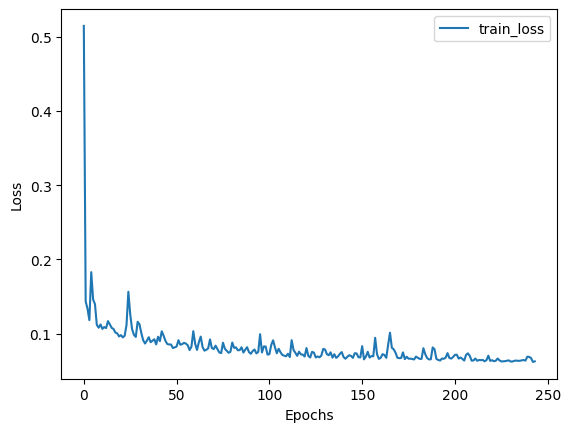

In [16]:
plt.plot(history.history['loss'], label='train_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

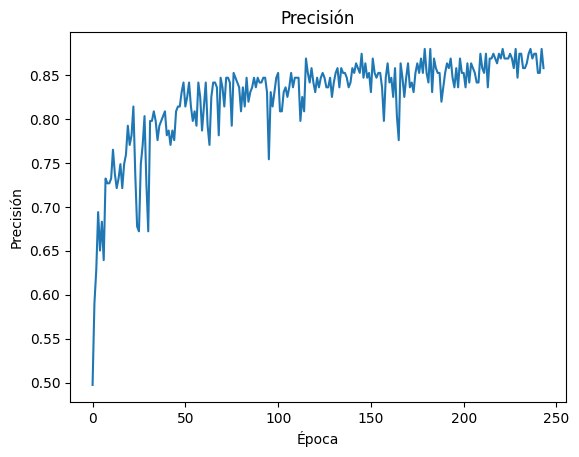

In [17]:
# Graficar la evolución de la métrica de evaluación (en este caso, precisión)
plt.plot(history.history['accuracy'])
plt.title('Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.show()

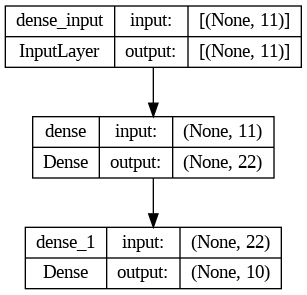

In [18]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

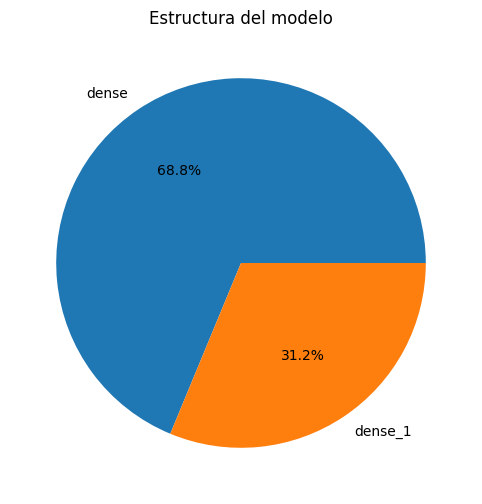

In [19]:
import matplotlib.pyplot as plt

# Obtener la estructura del modelo
model_layers = [layer.output for layer in model.layers]
layer_names = [layer.name for layer in model.layers]

# Crear el diagrama
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Estructura del modelo')
ax.axis('off')
_ = plt.pie([layer.shape[-1] for layer in model_layers], labels=layer_names, autopct='%1.1f%%')
plt.show()

## **Conclusión**

---



Basándonos en los resultados de los dos modelos, podemos concluir que el algoritmo de naive Bayes Gaussian parece tener un mejor rendimiento que la red neuronal para clasificar entre presencia o ausencia de enfermedad del corazón.

El algoritmo de naive Bayes Gaussian ha obtenido una exactitud de 0.83, lo que indica que el modelo ha clasificado correctamente el 83% de los casos del conjunto de datos. Por otro lado, la red neuronal ha obtenido una exactitud de 0.55 en un primer intento, después de varias modificaciones e intentos de entrenamiento, se ha mejorado significativamente su desempeño, obteniendo una exactitud de 0.817 y una pérdida (test loss) de 0.105. Esta mejora en el rendimiento indica que el modelo de red neuronal está clasificando correctamente una mayor proporción de casos en el conjunto de datos de prueba, lo cual es una buena señal.

Sin embargo, a pesar de la mejora, el algoritmo de naive Bayes Gaussian sigue teniendo una exactitud ligeramente mayor con un valor de 0.83. Por lo tanto, todavía es posible que este algoritmo sea una mejor opción para la clasificación de los casos en el conjunto de datos.

En general, la elección del modelo depende del conjunto de datos y el problema que se esté abordando, por lo que se recomienda probar varios modelos y ajustarlos adecuadamente para obtener los mejores resultados posibles. En este caso particular, dado que la exactitud es una métrica importante en el problema de clasificación de enfermedades, parece que el modelo de naive Bayes Gaussian es una mejor opción que la red neuronal.